 #**Problem Statement

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.**


Project template:


1.   Understand the data
2.   EDA
1.   Write 6 jar
2.   Create model
1.   Select best model
2.   Deploy the model






In [ ]:
#important library
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.ticker as tick
import matplotlib.patches as patches

% matplotlib inline
#import pygwalker as pyg

UsageError: Line magic function `%` not found.


In [ ]:
data = pd.read_csv("/content/train.csv")

In [ ]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
data.shape

(45211, 11)

In [ ]:
data = data.drop_duplicates()


In [ ]:
data.shape

(45205, 11)

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64


In [ ]:
data.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

In [ ]:
data.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


#target

In [ ]:
data.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45205, dtype: object

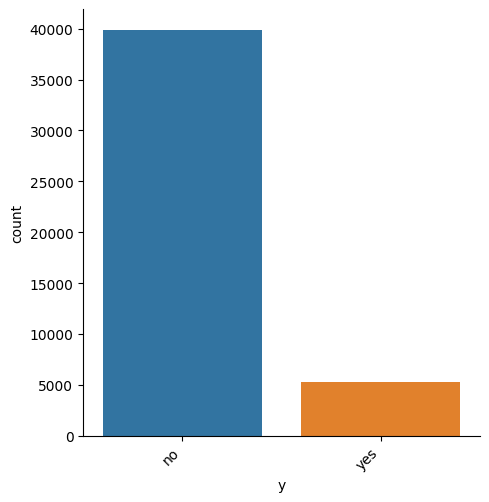

In [ ]:
chart = sns.catplot(x="y", kind="count", data=data)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

In [ ]:
data['target'] = data['y'].map({"yes" : 1, 'no': 0})


In [ ]:
print(data['age'].corr(data['target']))

0.025125993235085572


##Age

In [ ]:
data.age

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45205, dtype: int64

In [ ]:
data.age.value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

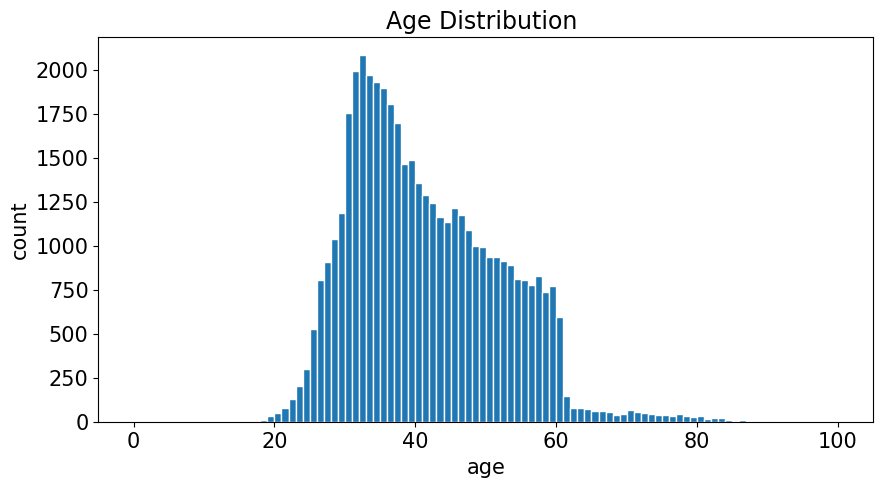

In [ ]:
data['age'].plot.hist(bins=100, figsize=(10,5), edgecolor='white',range=[0,100])
plt.xlabel('age', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Age Distribution ', fontsize=17)
plt.show()

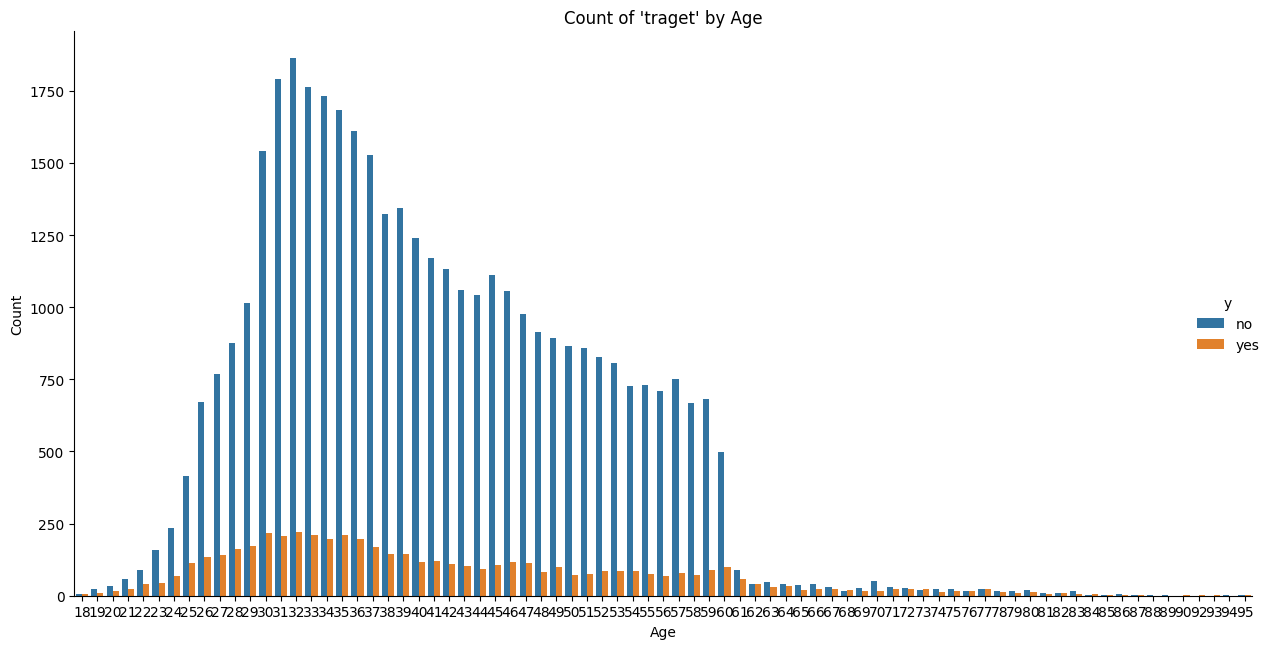

In [ ]:
chart = sns.catplot(x="age", hue="y", kind="count", data=data, height=6, aspect=2)

# Set labels and title
chart.set_xlabels("Age")
chart.set_ylabels("Count")
plt.title("Count of 'traget' by Age")

# Enlarge the chart
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()


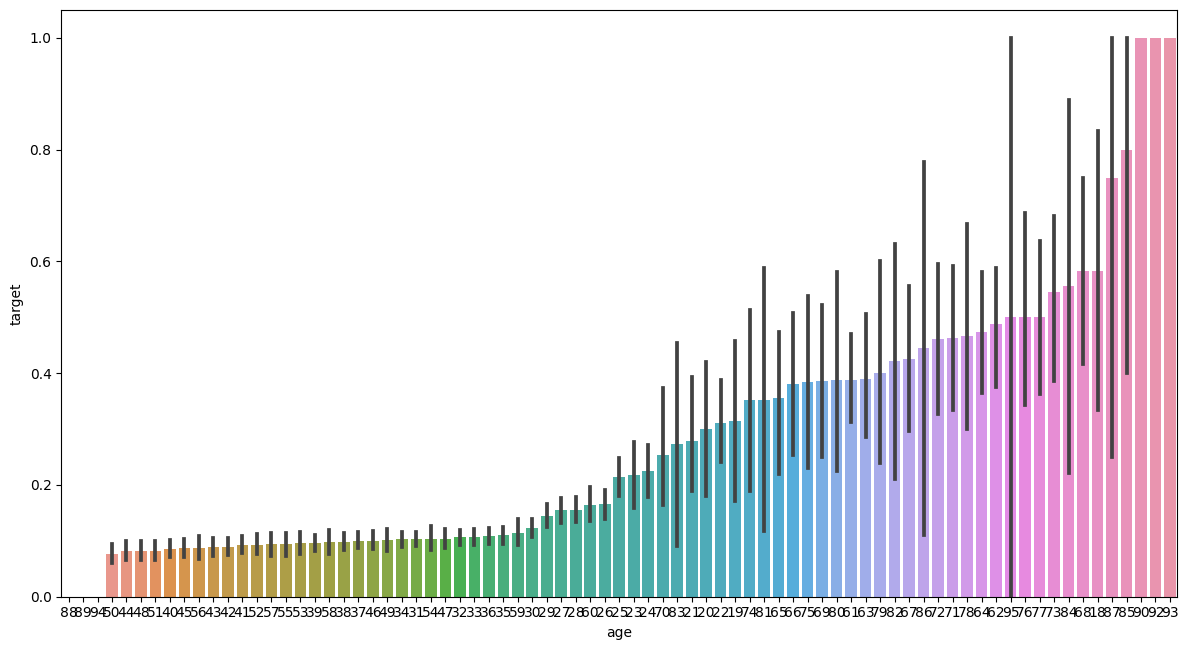

In [ ]:
conversion_rates = data.groupby('age')['target'].mean()
sorted_data = conversion_rates.reset_index().sort_values('target')['age']
plt.figure(figsize= (12,6))
sns.barplot(x = 'age' , y = 'target', data = data , order= sorted_data)
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()



##job

In [ ]:
data.job

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45205, dtype: object

In [ ]:

data["job"].value_counts()


blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

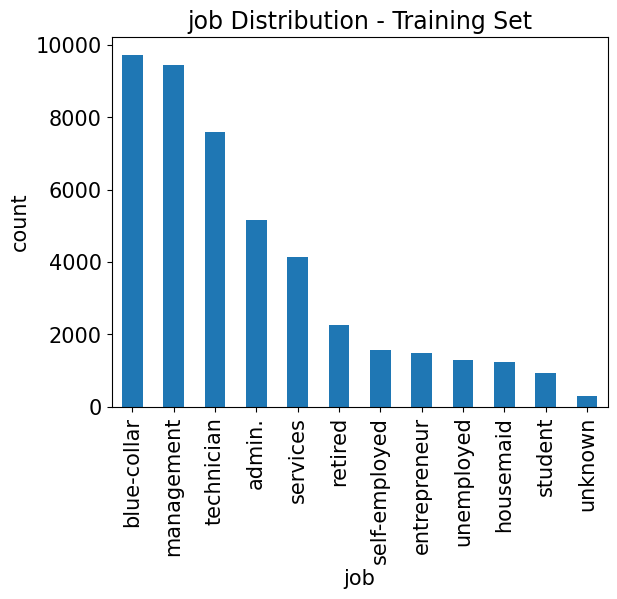

In [ ]:
data.job.value_counts().plot(kind='bar', title='Count (target)');
plt.xlabel('job', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('job Distribution - Training Set', fontsize=17)
plt.show()

here i am consider the unknown values as mis value so i try to impute based on mode

In [ ]:
data.job = data.job.str.replace("unknown","blue-collar" )

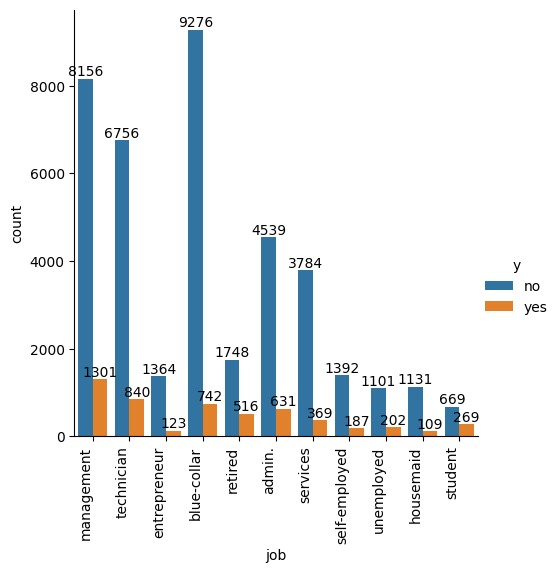

In [ ]:

# Create the catplot
g = sns.catplot(x="job", hue="y", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

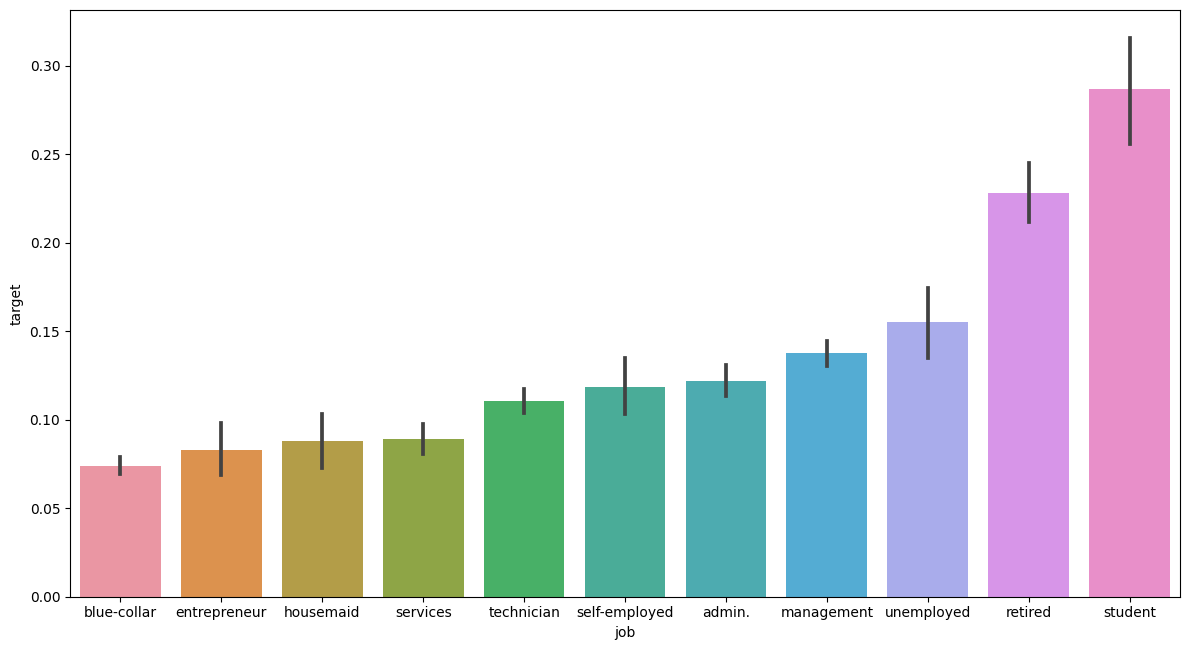

In [ ]:
conversion_rates = data.groupby('job')['target'].mean()
sorted_data = conversion_rates.reset_index().sort_values('target')['job']
plt.figure(figsize= (12,6))
sns.barplot(x = 'job' , y = 'target', data = data , order= sorted_data)
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()

based on the liner patten and some order in the data so consider to encode this columns as a label encoding

In [ ]:


# Create a dictionary mapping job categories to numerical labels
label_map = {'blue-collar': 0, 'management': 7, 'technician': 4, 'admin.': 6, 'services': 3,
             'retired': 9, 'self-employed': 5, 'entrepreneur': 1, 'unemployed': 8,
             'housemaid': 2, 'student': 10}

# Create a new column 'job_label' with numerical labels
data['job_label'] = data['job'].map(label_map)

# Display the updated DataFrame
print(data[['job', 'job_label']])


                job  job_label
0        management          7
1        technician          4
2      entrepreneur          1
3       blue-collar          0
4       blue-collar          0
...             ...        ...
45206    technician          4
45207       retired          9
45208       retired          9
45209   blue-collar          0
45210  entrepreneur          1

[45205 rows x 2 columns]


In [ ]:
print(data['job_label'].corr(data['target']))

0.059010160475787186


In [ ]:

# # Perform one-hot encoding
# one_hot_encoded = pd.get_dummies(data['job'], prefix='job')

# # Concatenate the original DataFrame and the one-hot encoded DataFrame
# data_encoded = pd.concat([data, one_hot_encoded], axis=1)

# # Display the updated DataFrame
# print(data_encoded)


##martial

In [ ]:
data.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

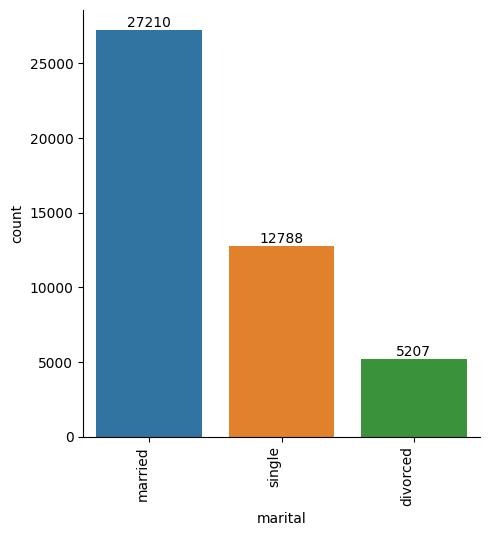

In [ ]:
g = sns.catplot(x="marital", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

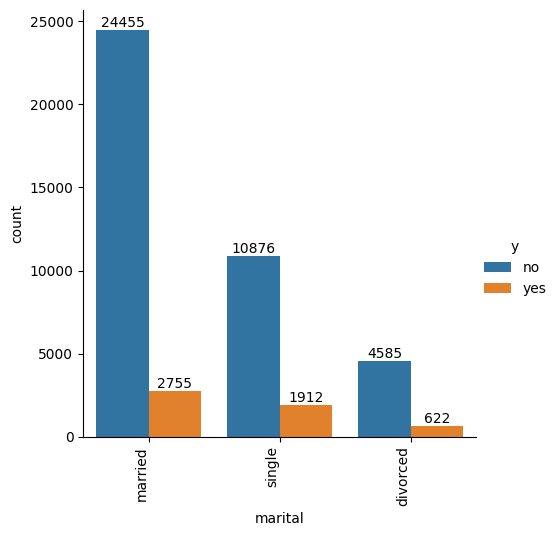

In [ ]:
g = sns.catplot(x="marital", hue="y", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

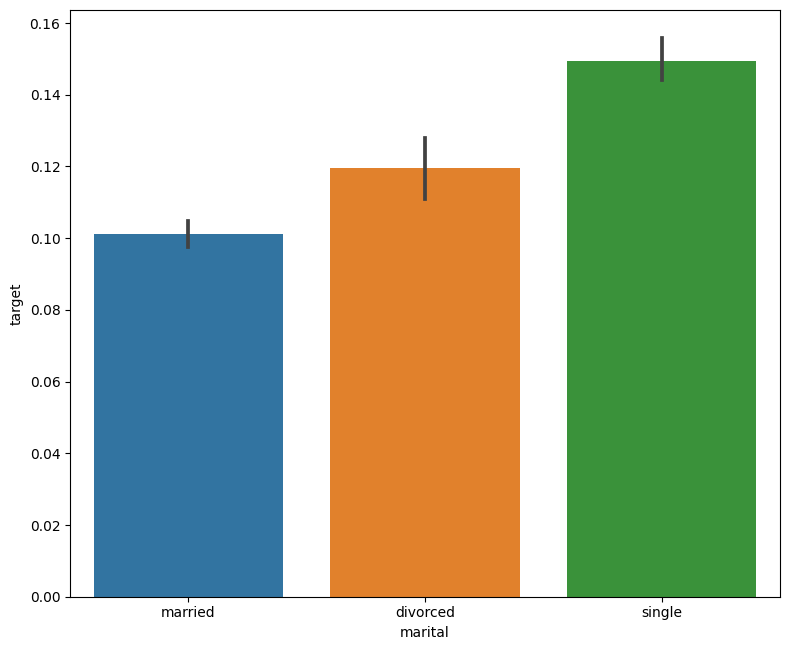

In [ ]:
conversion_rates = data.groupby('marital')['target'].mean()
sorted_data = conversion_rates.reset_index().sort_values('target')['marital']
plt.figure(figsize= (8,6))
sns.barplot(x = 'marital' , y = 'target', data = data , order= sorted_data)
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()


based on the liner patten and some order in the data so consider to encode this columns as a label encoding

In [ ]:
# Create a dictionary mapping marital categories to numerical labels
label_map = {'married': 0, 'single': 2, 'divorced': 1}

# Create a new column 'marital_label' with numerical labels
data['marital_label'] = data['marital'].map(label_map)

# Display the updated DataFrame
data[['marital', 'marital_label']]

,marital,marital_label
0,married,0
1,single,2
2,married,0
3,married,0
4,single,2
...,...,...
45206,married,0
45207,divorced,1
45208,married,0
45209,married,0


In [ ]:
# # Perform one-hot encoding
# one_hot_encoded = pd.get_dummies(data['marital'], prefix='marital')

# # Concatenate the original DataFrame and the one-hot encoded DataFrame
# data_encoded = pd.concat([data, one_hot_encoded], axis=1)

# # Display the updated DataFrame
# print(data_encoded)

In [ ]:
print(data['marital_label'].corr(data['target']))

0.06567314727325914


##education_qual

In [ ]:
data.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

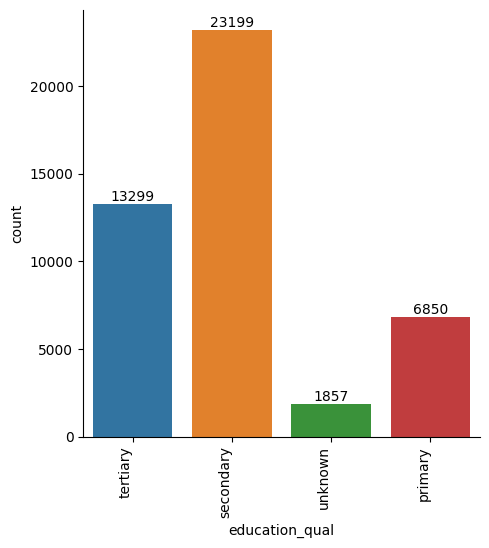

In [ ]:
g = sns.catplot(x="education_qual", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

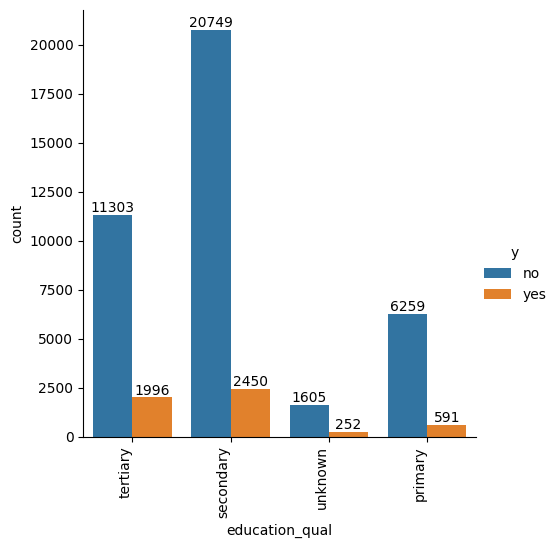

In [ ]:
# Create the catplot
g = sns.catplot(x="education_qual", hue="y", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

In [ ]:
data.education_qual = data.education_qual.str.replace("unknown",'secondary')

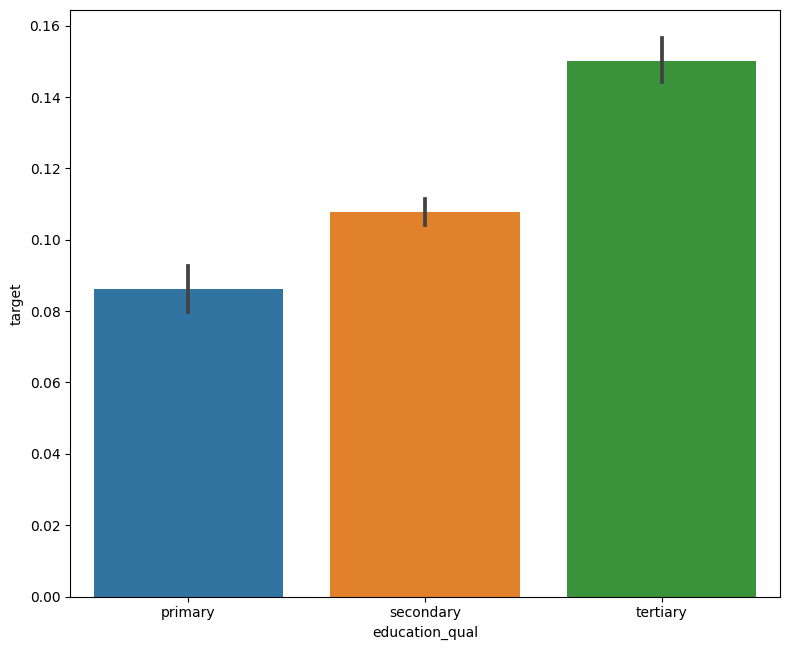

In [ ]:
conversion_rates = data.groupby('education_qual')['target'].mean()
sorted_data = conversion_rates.reset_index().sort_values('target')['education_qual']
plt.figure(figsize= (8,6))
sns.barplot(x = 'education_qual' , y = 'target', data = data , order= sorted_data)
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()
#based on the liner patten and some order in the data so consider to encode this columns as a label encoding


based on the liner patten and some order in the data so consider to encode this columns as a label encoding

In [ ]:
# Create a dictionary mapping education categories to numerical labels
label_map = {'secondary': 1, 'tertiary': 2, 'primary': 0, }

# Create a new column 'education_label' with numerical labels
data['education_label'] = data["education_qual"].map(label_map)

# Display the updated DataFrame
data[["education_qual", 'education_label']]

,education_qual,education_label
0,tertiary,2
1,secondary,1
2,secondary,1
3,secondary,1
4,secondary,1
...,...,...
45206,tertiary,2
45207,primary,0
45208,secondary,1
45209,secondary,1


In [ ]:
# one_hot_encoded = pd.get_dummies(data["education_qual"], prefix='education')

# # Concatenate the original DataFrame and the one-hot encoded DataFrame
# data_encoded = pd.concat([data, one_hot_encoded], axis=1)

# # Display the updated DataFrame
# print(data_encoded)

In [ ]:
print(data['education_label'].corr(data['target']))

0.06864022309398703


##call_type

In [ ]:
data.call_type

0          unknown
1          unknown
2          unknown
3          unknown
4          unknown
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: call_type, Length: 45205, dtype: object

In [ ]:
data.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

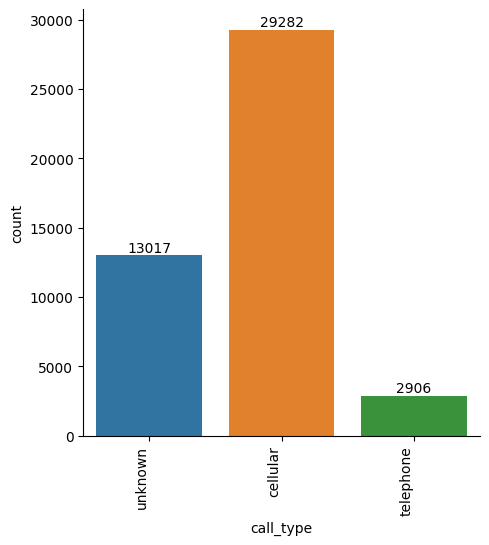

In [ ]:
g = sns.catplot(x="call_type", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

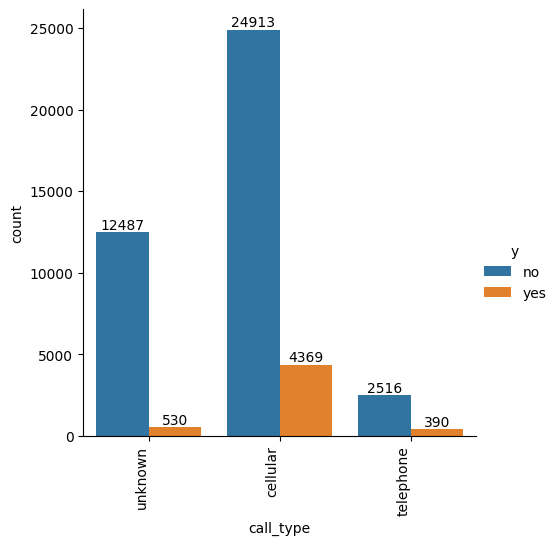

In [ ]:
g = sns.catplot(x="call_type", hue="y", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

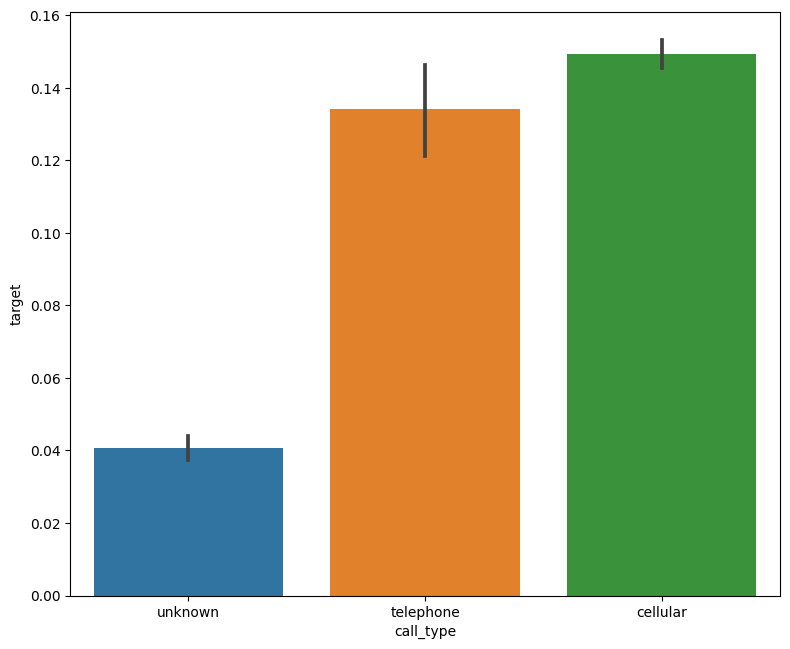

In [ ]:
conversion_rates = data.groupby('call_type')['target'].mean()
sorted_data = conversion_rates.reset_index().sort_values('target')['call_type']
plt.figure(figsize= (8,6))
sns.barplot(x = 'call_type' , y = 'target', data = data , order= sorted_data)
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()
#based on the liner patten and some order in the data so consider to encode this columns as a label encoding

based on the liner patten and some order in the data so consider to encode this columns as a label encoding

In [ ]:
label_map = {'cellular': 2, 'unknown': 0, 'telephone': 1}

# Create a new column 'call_type_label' with numerical labels
data['call_type_label'] = data['call_type'].map(label_map)

# Display the updated DataFrame
print(data[['call_type', 'call_type_label']])

       call_type  call_type_label
0        unknown                0
1        unknown                0
2        unknown                0
3        unknown                0
4        unknown                0
...          ...              ...
45206   cellular                2
45207   cellular                2
45208   cellular                2
45209  telephone                1
45210   cellular                2

[45205 rows x 2 columns]


In [ ]:
# # Perform one-hot encoding
# one_hot_encoded = pd.get_dummies(data['call_type'], prefix='call_type')

# # Concatenate the original DataFrame and the one-hot encoded DataFrame
# data_encoded = pd.concat([data, one_hot_encoded], axis=1)

# # Display the updated DataFrame
# print(data_encoded)


In [ ]:
print(data['call_type_label'].corr(data['target']))

0.14839062567259545


##day

In [ ]:
data.day

0         5
1         5
2         5
3         5
4         5
         ..
45206    17
45207    17
45208    17
45209    17
45210    17
Name: day, Length: 45205, dtype: int64

In [ ]:
data.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

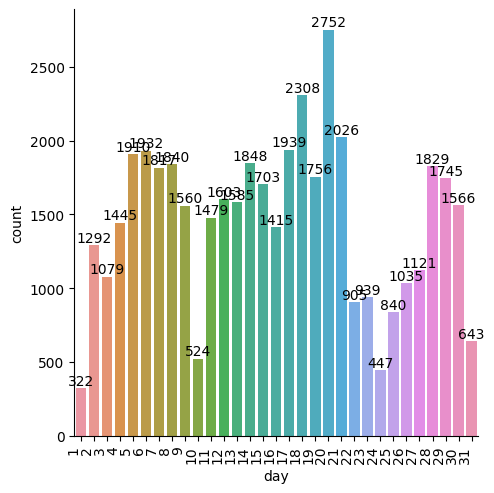

In [ ]:
g = sns.catplot(x="day", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

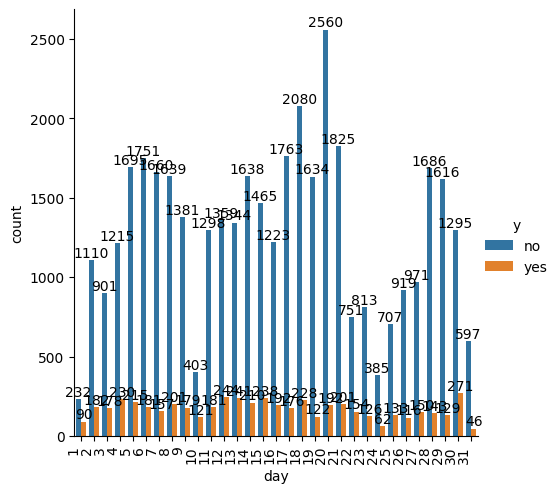

In [ ]:
g = sns.catplot(x="day", hue="y", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

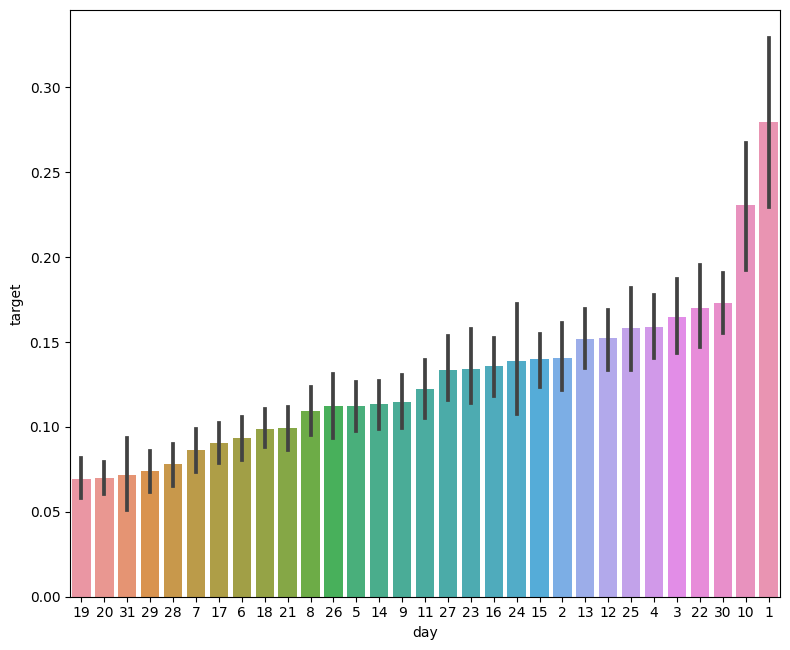

In [ ]:
conversion_rates = data.groupby('day')['target'].mean()
sorted_data = conversion_rates.reset_index().sort_values('target')['day']
plt.figure(figsize= (8,6))
sns.barplot(x = 'day' , y = 'target', data = data , order= sorted_data)
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()
#based on the liner patten and some order in the data so consider to encode this columns as a label encoding

In [ ]:
print(data['day'].corr(data['target']))

-0.028370532541669158


##month

In [ ]:
data.mon

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: mon, Length: 45205, dtype: object

In [ ]:
data.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

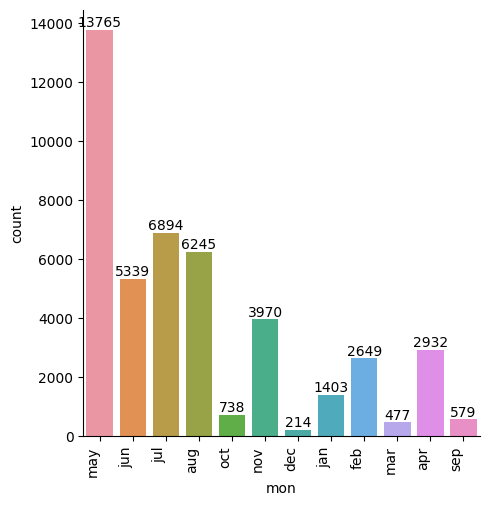

In [ ]:
g = sns.catplot(x="mon", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

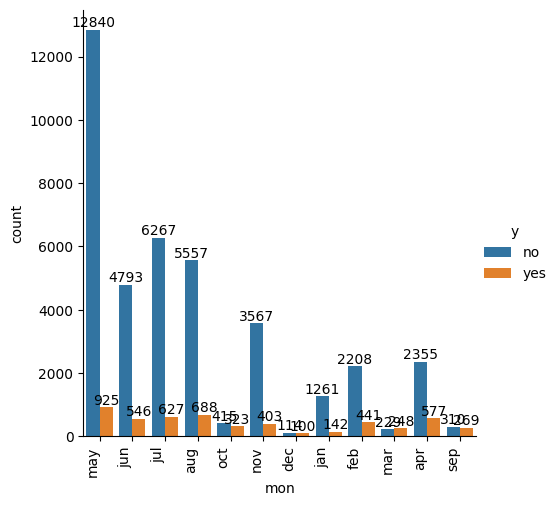

In [ ]:
g = sns.catplot(x="mon", hue="y", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

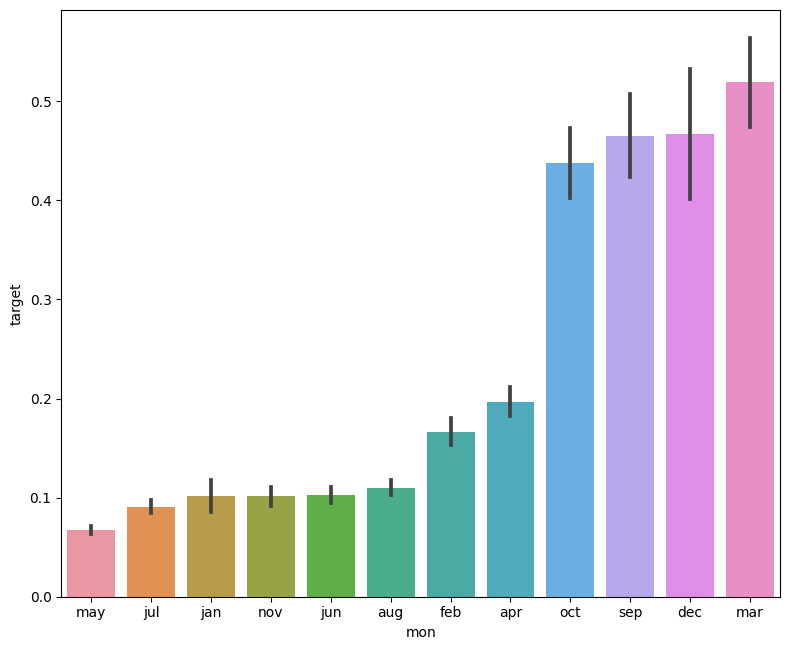

In [ ]:
conversion_rates = data.groupby('mon')['target'].mean()
sorted_data = conversion_rates.reset_index().sort_values('target')['mon']
plt.figure(figsize= (8,6))
sns.barplot(x = 'mon' , y = 'target', data = data , order= sorted_data)
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()
#based on the liner patten and some order in the data so consider to encode this columns as a label encoding

In [ ]:


# Create a dictionary mapping month categories to numerical labels
label_map = {'may': 0, 'jul': 1, 'aug':5 , 'jun':4 , 'nov': 3, 'apr': 7,
             'feb': 6, 'jan': 2, 'oct': 8, 'sep': 9, 'mar': 11, 'dec': 10}

# Create a new column 'mon_label' with numerical labels
data['mon_label'] = data['mon'].map(label_map)

# Display the updated DataFrame
print(data[['mon', 'mon_label']])


       mon  mon_label
0      may          0
1      may          0
2      may          0
3      may          0
4      may          0
...    ...        ...
45206  nov          3
45207  nov          3
45208  nov          3
45209  nov          3
45210  nov          3

[45205 rows x 2 columns]


In [ ]:
print(data['mon_label'].corr(data['target']))

0.2041868569587218


In [ ]:
# import pandas as pd

# # Perform one-hot encoding
# one_hot_encoded = pd.get_dummies(data['mon'], prefix='mon')

# # Concatenate the original DataFrame and the one-hot encoded DataFrame
# data_encoded = pd.concat([data, one_hot_encoded], axis=1)

# # Display the updated DataFrame
# print(data_encoded)


##duration

In [ ]:
data.dur

0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: dur, Length: 45205, dtype: int64

In [ ]:
data.dur.value_counts()

124     187
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

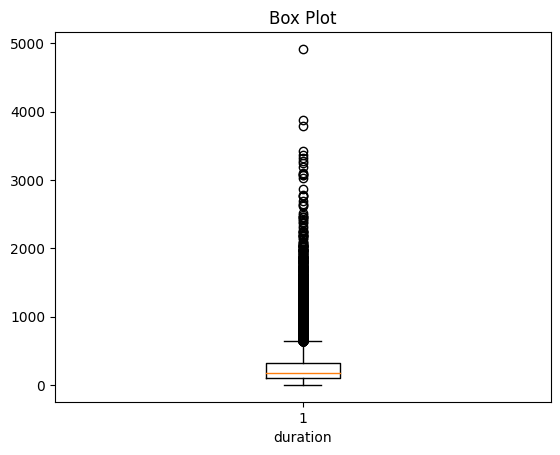

In [ ]:
plt.boxplot(data.dur)

# Add labels and title
plt.xlabel('duration')
plt.ylabel('')
plt.title('Box Plot')

# Display the plot
plt.show()

Text(0, 0.5, 'credit score')

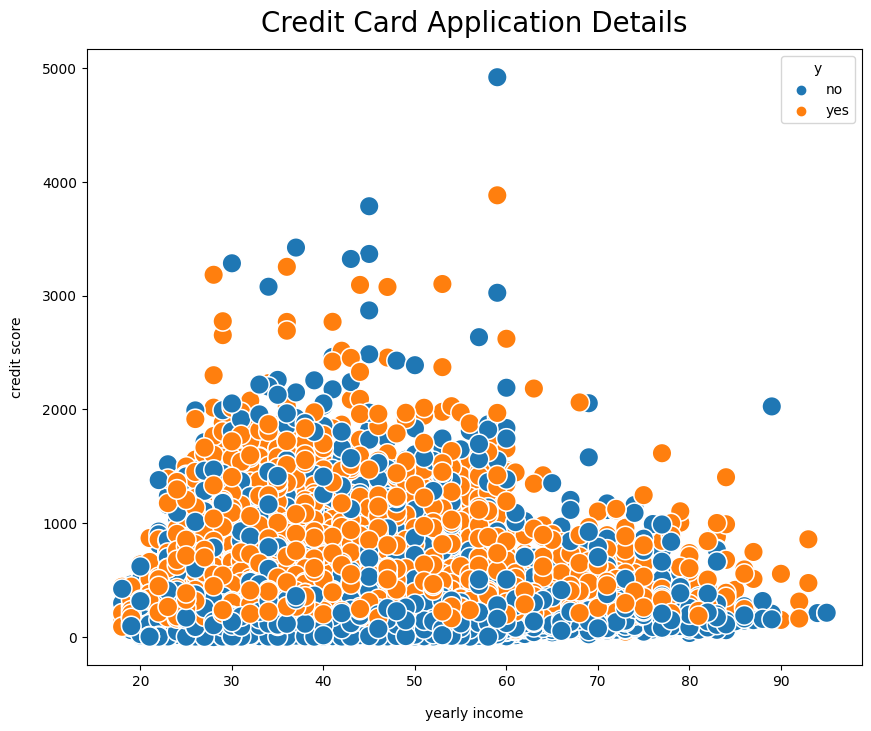

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='dur', hue='y', data=data, s=200)
plt.title("Credit Card Application Details", y=1.015, fontsize=20)
plt.xlabel("yearly income", labelpad=13)
plt.ylabel("credit score", labelpad=13)
# ax = plt.gca()
# ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

In [ ]:
# column = data['dur']

# # Calculate the first quartile (Q1), third quartile (Q3), and IQR
# Q1 = np.percentile(column, 25)
# Q3 = np.percentile(column, 75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for identifying outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Find the outliers
# outliers = column[(column < lower_bound) | (column > upper_bound)]
# clipped_column = column.clip(lower_bound, upper_bound)
# print(len(outliers))
# # Display the outliers
# print("Outliers:")
# print(outliers)
iqr = data['dur'].quantile(0.75) - data['dur'].quantile(0.25)
upper_threshold = data['dur'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['dur'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
data['dur_label'] = data['dur'].clip(lower_threshold, upper_threshold)

643.0 -221.0


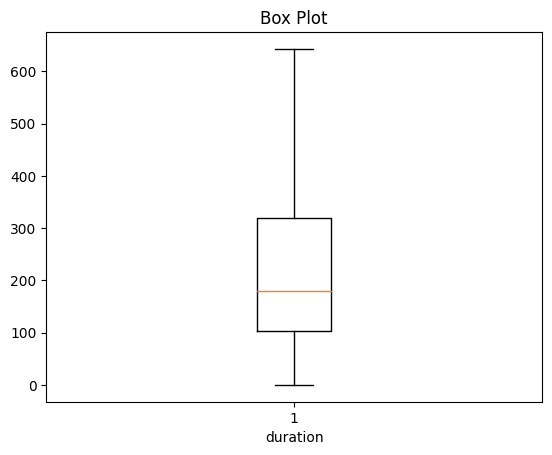

In [ ]:
plt.boxplot(data.dur_label)

# Add labels and title
plt.xlabel('duration')
plt.ylabel('')
plt.title('Box Plot')

# Display the plot
plt.show()

Text(0, 0.5, 'credit score')

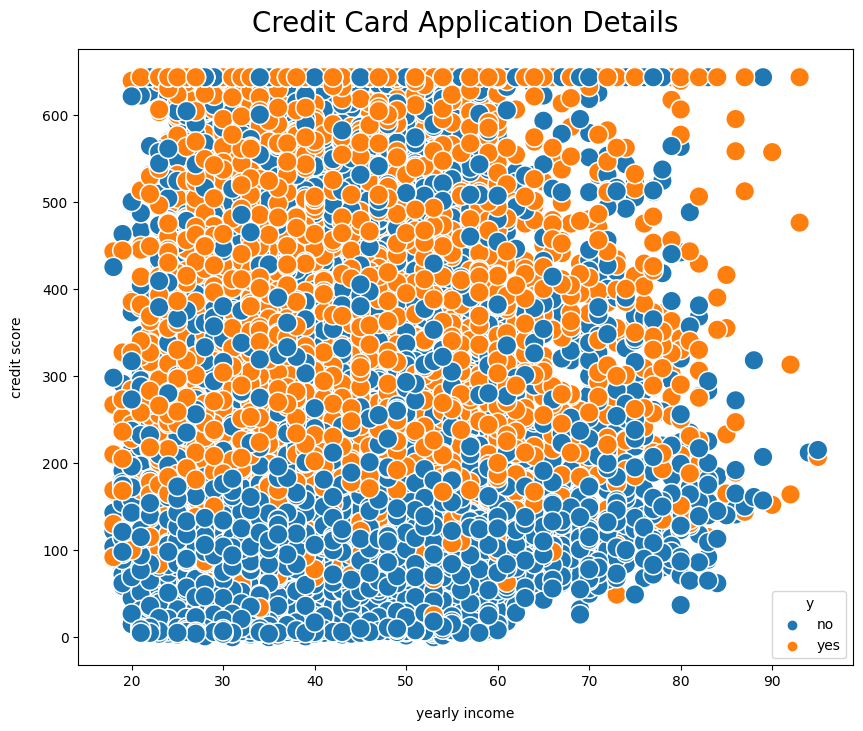

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='dur_label', hue='y', data=data, s=200)
plt.title("Credit Card Application Details", y=1.015, fontsize=20)
plt.xlabel("yearly income", labelpad=13)
plt.ylabel("credit score", labelpad=13)


In [ ]:
# conversion_rates = data.groupby('dur')['target'].mean()
# sorted_data = conversion_rates.reset_index().sort_values('target')['dur']
# plt.figure(figsize= (8,6))
# sns.barplot(x = 'dur' , y = 'target', data = data , order= sorted_data)
# plt.tight_layout(rect=[0, 0, 1, 1.1])

# # Show the plot
# plt.show()
# #based on the liner patten and some order in the data so consider to encode this columns as a label encoding

##number_calls

In [ ]:
data.num_calls

0        1
1        1
2        1
3        1
4        1
        ..
45206    3
45207    2
45208    5
45209    4
45210    2
Name: num_calls, Length: 45205, dtype: int64

In [ ]:
data.num_calls.value_counts()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

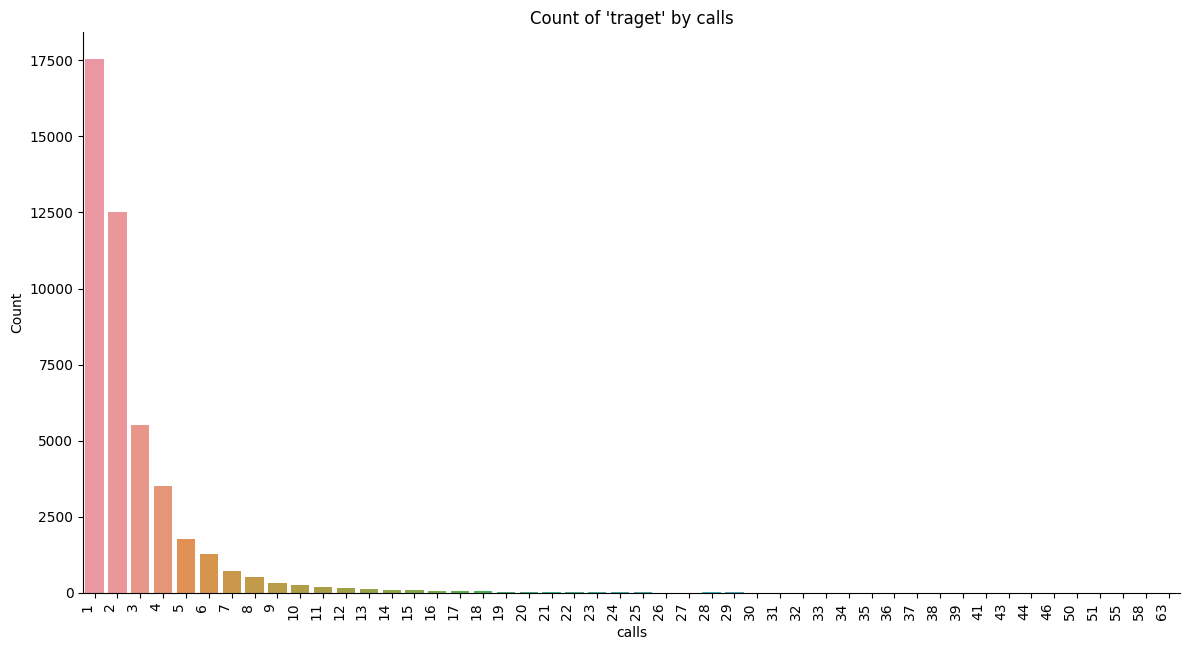

In [ ]:
chart = sns.catplot(x="num_calls",  kind="count", data=data, height=6, aspect=2)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

# Set labels and title
chart.set_xlabels("calls")
chart.set_ylabels("Count")
plt.title("Count of 'traget' by calls")
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


# Enlarge the chart
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()

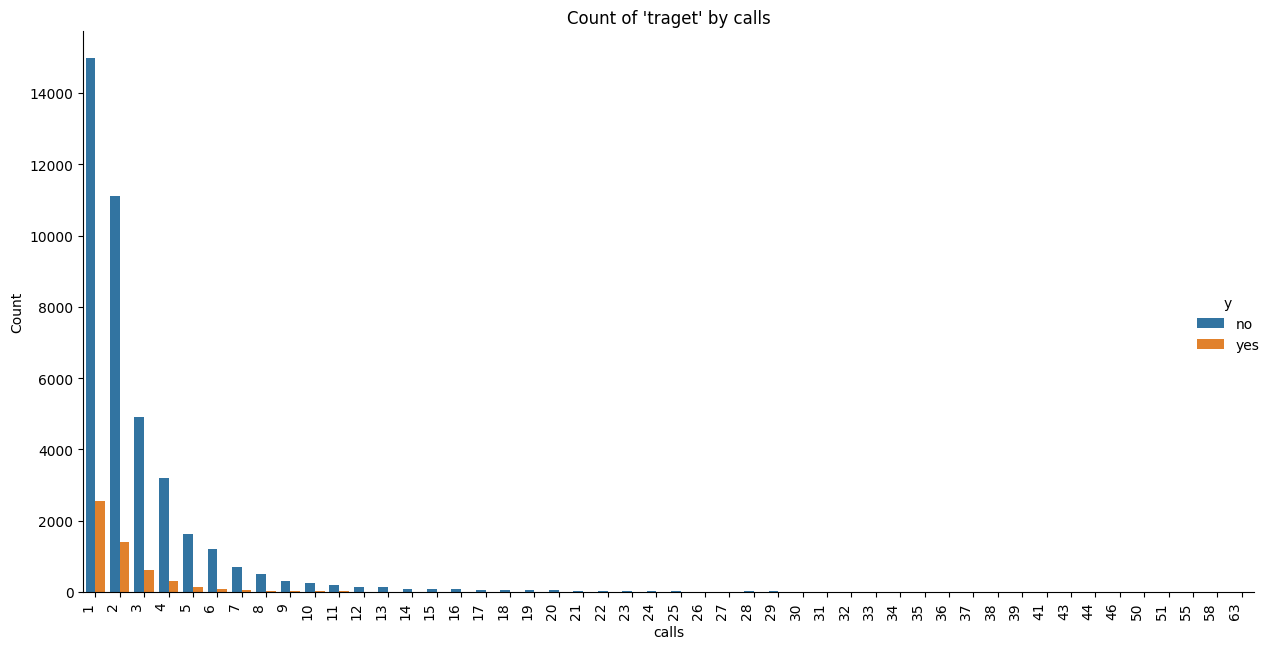

In [ ]:

chart = sns.catplot(x="num_calls", hue="y", kind="count", data=data, height=6, aspect=2)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

# Set labels and title
chart.set_xlabels("calls")
chart.set_ylabels("Count")
plt.title("Count of 'traget' by calls")
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


# Enlarge the chart
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()

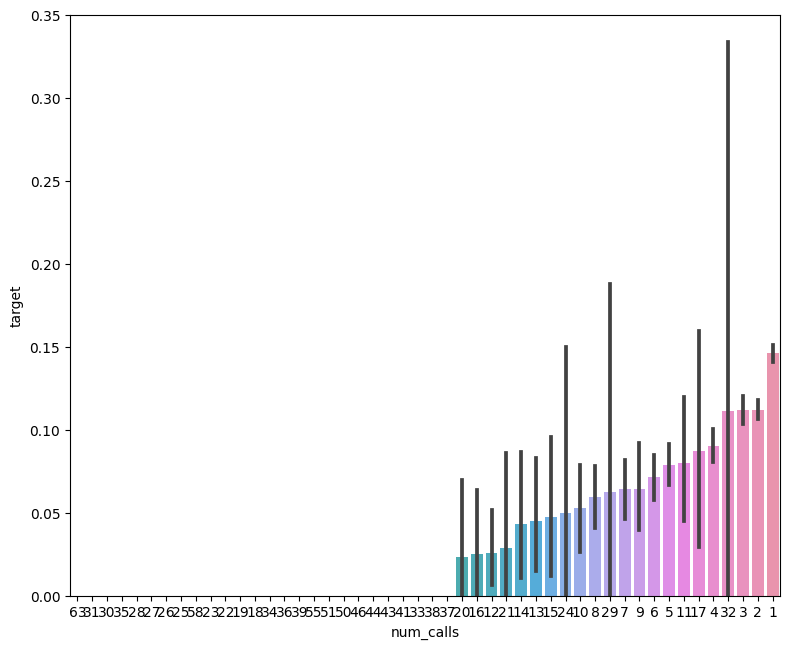

In [ ]:
conversion_rates = data.groupby('num_calls')['target'].mean()
sorted_data = conversion_rates.reset_index().sort_values('target')['num_calls']
plt.figure(figsize= (8,6))
sns.barplot(x = 'num_calls' , y = 'target', data = data , order= sorted_data)
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()
#based on the liner patten and some order in the data so consider to encode this columns as a label encoding

In [ ]:
print(data['num_calls'].corr(data['target']))

-0.0731802440451999


##previous calls

In [ ]:
data.prev_outcome

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
45206    unknown
45207    unknown
45208    success
45209    unknown
45210      other
Name: prev_outcome, Length: 45205, dtype: object

In [ ]:
data.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

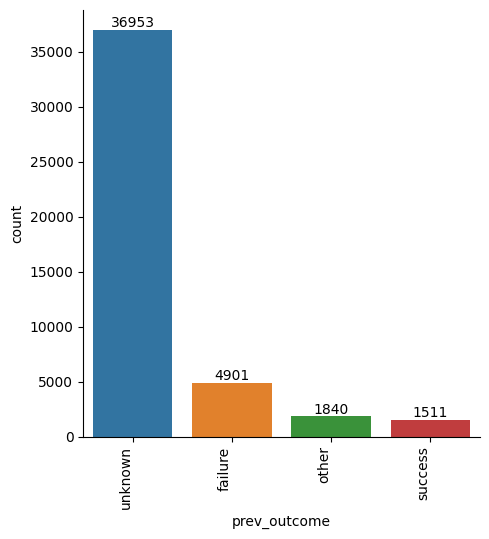

In [ ]:
g = sns.catplot(x="prev_outcome", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

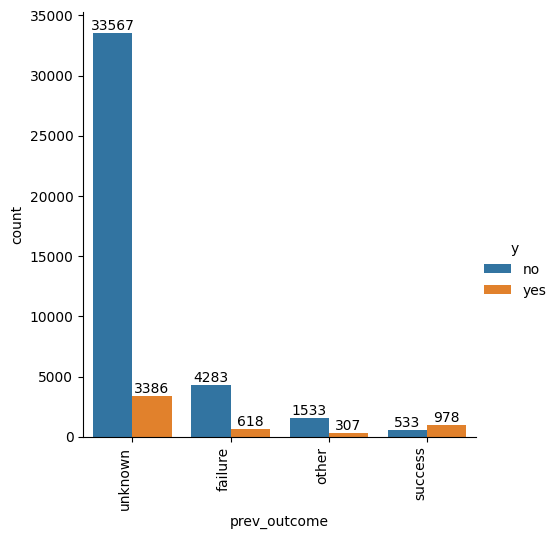

In [ ]:
g = sns.catplot(x="prev_outcome", hue="y", kind="count", data=data)
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Access the underlying axes
ax = g.ax

# Iterate over each bar and add count text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

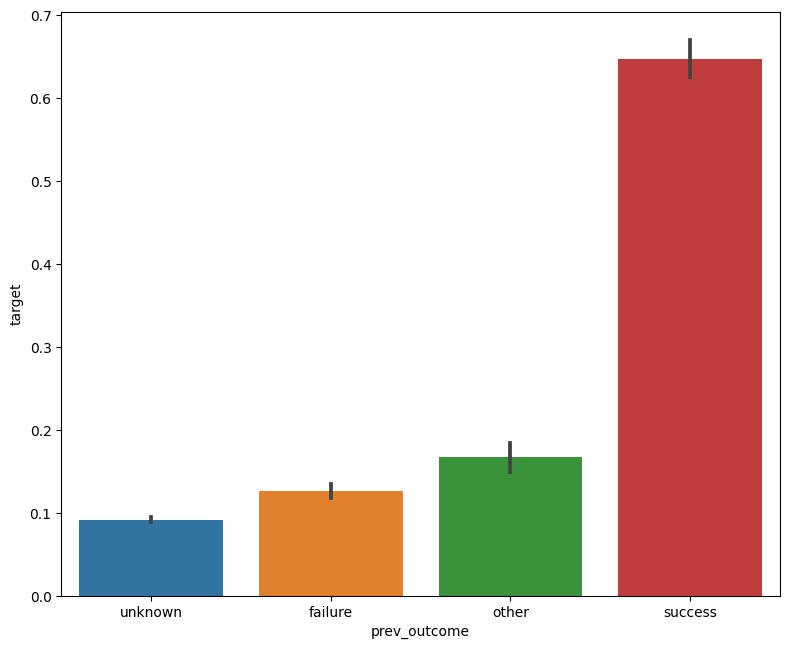

In [ ]:
conversion_rates = data.groupby('prev_outcome')['target'].mean()
sorted_data = conversion_rates.reset_index().sort_values('target')['prev_outcome']
plt.figure(figsize= (8,6))
sns.barplot(x = 'prev_outcome' , y = 'target', data = data , order= sorted_data)
plt.tight_layout(rect=[0, 0, 1, 1.1])

# Show the plot
plt.show()
#based on the liner patten and some order in the data so consider to encode this columns as a label encoding

In [ ]:
label_map = {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}

# Apply mapping using the map() function
data["prev_outcome_labels"] = data['prev_outcome'].map(label_map)
print(data[['prev_outcome', 'prev_outcome_labels']])



      prev_outcome  prev_outcome_labels
0          unknown                    0
1          unknown                    0
2          unknown                    0
3          unknown                    0
4          unknown                    0
...            ...                  ...
45206      unknown                    0
45207      unknown                    0
45208      success                    3
45209      unknown                    0
45210        other                    2

[45205 rows x 2 columns]


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target', 'job_label',
       'marital_label', 'education_label', 'call_type_label', 'mon_label',
       'dur_label', 'prev_outcome_labels'],
      dtype='object')

In [ ]:
print(data['prev_outcome_labels'].corr(data['target']))

0.2593001105698564


##imbalanced data

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target', 'job_label',
       'marital_label', 'education_label', 'call_type_label', 'mon_label',
       'dur_label', 'prev_outcome_labels'],
      dtype='object')

In [ ]:
im = data[["age","job_label","marital_label","education_label","call_type_label","day","mon_label","dur_label","num_calls","prev_outcome_labels","target"]]

In [ ]:
im

,age,job_label,marital_label,education_label,call_type_label,day,mon_label,dur_label,num_calls,prev_outcome_labels,target
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
3,47,0,0,1,0,5,0,92,1,0,0
4,33,0,2,1,0,5,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,643,3,0,1
45207,71,9,1,0,2,17,3,456,2,0,1
45208,72,9,0,1,2,17,3,643,5,3,1
45209,57,0,0,1,1,17,3,508,4,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x = im[["age","job_label","marital_label","education_label","call_type_label","day","mon_label","dur_label","num_calls","prev_outcome_labels"]].values # independent features
y = im["target"].astype(int).values # y -> target/true labels
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, stratify=y)



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn

In [ ]:
from imblearn.combine import SMOTEENN



smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(x_train, y_train)



In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # initialise the model, ready to be used
log_reg.fit(X_smt, y_smt) #training of data happens

LogisticRegression()

In [ ]:
log_reg.predict_proba(x_test)

array([[0.82185752, 0.17814248],
       [0.82878528, 0.17121472],
       [0.99897351, 0.00102649],
       ...,
       [0.20283861, 0.79716139],
       [0.56665105, 0.43334895],
       [0.22532911, 0.77467089]])

In [ ]:
log_reg.predict(x_test)

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
accuracy_test_set = log_reg.score(x_test, y_test)
accuracy_test_set

0.7776794602366994

In [ ]:
#from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score
#logistic_regression.score(X_test,y_test) # accuracy
#confusion_matrix(y_test,y_pred)
#f1_score(y_test,y_pred) # f1 score
# logistic_regression.score(X_test,y_test)
#plot_roc_curve(logistic_regression, X_test, y_test) #AUROC
#accuracy_score(y_test,y_pred

In [ ]:
from sklearn.metrics import  confusion_matrix, f1_score
cnf_matrix = confusion_matrix(y_test, log_reg.predict(x_test))
cnf_matrix




array([[6100, 1883],
       [ 127,  931]])

In [ ]:
f1_score(y_test,log_reg.predict(x_test)) # f1 score


0.4808884297520661

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, log_reg.predict(x_test)))

0.7776794602366994


In [ ]:
from sklearn.metrics import precision_score
print("Precision: {0}".format(precision_score(y_test, log_reg.predict(x_test))))

Precision: 0.3308457711442786


In [ ]:
from sklearn.metrics import recall_score
print("Recall:", round(recall_score(y_test, log_reg.predict(x_test)), 2))

Recall: 0.88


##knn

In [ ]:
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(x_train, y_train)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(3)
knn.fit(X_smt,y_smt)
knn.score(x_test,y_test)

0.8189359584116801

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_smt,y_smt) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_smt,y_smt) , " cv score : ", np.mean(cross_val_score(knn, X_smt,y_smt, cv=10, scoring = "f1"))) #predicting using the model




K value  :  1  train score :  1.0  cv score :  0.9973281126873831
K value  :  2  train score :  0.9999114934593667  cv score :  0.9972602636839463
K value  :  3  train score :  0.9980705574141929  cv score :  0.9923461679373171
K value  :  4  train score :  0.9980351547979396  cv score :  0.9923003239727277
K value  :  5  train score :  0.9943001787832121  cv score :  0.9861826095215249
K value  :  6  train score :  0.9942293735507054  cv score :  0.9860393857679453
K value  :  7  train score :  0.988989786345211  cv score :  0.9801499284729058
K value  :  8  train score :  0.988989786345211  cv score :  0.9797245001155058
K value  :  9  train score :  0.9827589258846229  cv score :  0.9746904395313647
K value  :  10  train score :  0.9828474324252562  cv score :  0.9747459423099969
K value  :  20  train score :  0.9633582921777919  cv score :  0.9592342692493734
K value  :  50  train score :  0.9395323314392934  cv score :  0.9402055603379926


In [ ]:
knn = KNeighborsClassifier(1)
cv_results = np.mean(cross_val_score(knn, X_smt,y_smt, cv=10, scoring = "f1"))
cv_results

0.9973281126873831

In [ ]:
#knn = KNeighborsClassifier(2)
knn = KNeighborsClassifier(2)
cv_results = np.mean(cross_val_score(knn, X_smt,y_smt, cv=10, scoring = "f1"))
cv_results


0.9972602636839463

In [ ]:
knn = KNeighborsClassifier(3)
cv_results = np.mean(cross_val_score(knn, X_smt,y_smt, cv=10, scoring = "f1"))
cv_results

0.9923461679373171

##decsion tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(x_train, y_train)


# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_smt,y_smt) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(x_test)
y_pred
#print(y_pred[0:5])

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(x_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))


Test set accuracy: 0.85
Test set f1-score: 0.55


In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt,y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = np.mean(cross_val_score(dt, X_smt,y_smt, cv=10, scoring = "f1")) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " , valAccuracy)


Depth  :  1  Training Accuracy :  0.7663427327279486  Cross val score :  0.7927280049636191
Depth  :  2  Training Accuracy :  0.7940806825624414  Cross val score :  0.8309831568901455
Depth  :  3  Training Accuracy :  0.8671693838174641  Cross val score :  0.8843983487470162
Depth  :  4  Training Accuracy :  0.8693466447170446  Cross val score :  0.8842477439865603
Depth  :  5  Training Accuracy :  0.8898447595277291  Cross val score :  0.8939773098927599
Depth  :  6  Training Accuracy :  0.9032092471633654  Cross val score :  0.9116042853451172
Depth  :  7  Training Accuracy :  0.9125555378542475  Cross val score :  0.9158007193093409
Depth  :  8  Training Accuracy :  0.9217956206963694  Cross val score :  0.9223077582684773
Depth  :  9  Training Accuracy :  0.9336200945249854  Cross val score :  0.9283954308374373
Depth  :  10  Training Accuracy :  0.9442585807091144  Cross val score :  0.9372945456325938
Depth  :  20  Training Accuracy :  0.9985661940417396  Cross val score :  0.960

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth
dt = DecisionTreeClassifier(max_depth=7)

# Fit dt to the training set
dt.fit(X_smt,y_smt) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(x_test)
y_pred
#print(y_pred[0:5])
from sklearn.metrics import accuracy_score, f1_score
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(x_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))

Test set accuracy: 0.79
Test set f1-score: 0.49


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth
dt = DecisionTreeClassifier(max_depth=8)

# Fit dt to the training set
dt.fit(X_smt,y_smt) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(x_test)
y_pred
#print(y_pred[0:5])
from sklearn.metrics import accuracy_score, f1_score
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(x_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))

Test set accuracy: 0.78
Test set f1-score: 0.48


[Text(0.46603697749196143, 0.9444444444444444, 'x[7] <= -0.17\ngini = 0.497\nsamples = 56453\nvalue = [26083, 30370]'),
 Text(0.23633440514469453, 0.8333333333333334, 'x[6] <= 0.791\ngini = 0.344\nsamples = 23012\nvalue = [17930, 5082]'),
 Text(0.13967041800643087, 0.7222222222222222, 'x[9] <= 2.467\ngini = 0.184\nsamples = 17993\nvalue = [16144, 1849]'),
 Text(0.07757234726688103, 0.6111111111111112, 'x[7] <= -0.43\ngini = 0.127\nsamples = 17294\nvalue = [16118, 1176]'),
 Text(0.03376205787781351, 0.5, 'x[0] <= -1.701\ngini = 0.065\nsamples = 13373\nvalue = [12924, 449]'),
 Text(0.012861736334405145, 0.3888888888888889, 'x[6] <= -1.032\ngini = 0.493\nsamples = 84\nvalue = [47, 37]'),
 Text(0.006430868167202572, 0.2777777777777778, 'x[5] <= 0.922\ngini = 0.111\nsamples = 34\nvalue = [32, 2]'),
 Text(0.003215434083601286, 0.16666666666666666, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.00964630225080386, 0.16666666666666666, 'x[5] <= 1.285\ngini = 0.32\nsamples = 10\nvalue = [

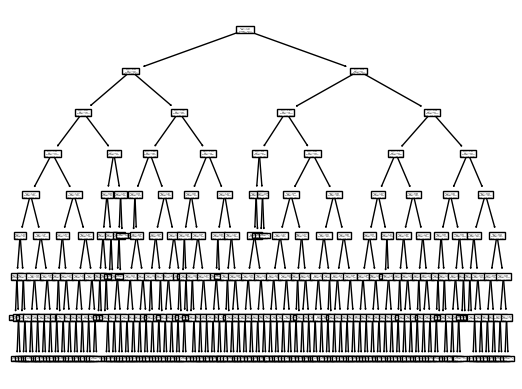

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

##ensemble Techniques

In [ ]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(2)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') # it will stitich all the models together, voting = hard means max voting
# we need to give the list of models that we are trying to combine
model.fit(X_smt,y_smt) # to train all of the models
preds = model.predict(x_test)
#model.score(x_test,y_test) # prediction
f1_score(y_test,model.predict(x_test))

0.5488578680203046

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
# weakLearner = tree.DecisionTreeClassifier(max_depth = 1)
# weakLearner.fit(x_train, y_train)
# weakLearner.score(x_test,y_test)
model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth = 7, random_state=1), n_estimators=100)
model.fit(X_smt,y_smt)
model.score(x_test,y_test)
f1_score(y_test,model.predict(x_test))

0.5022880215343203

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_smt,y_smt) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_smt,y_smt), " Cross-Val score : ", np.mean(cross_val_score(model,X_smt,y_smt, cv=10, scoring = "f1")))

Learning rate :  0.01  Train score :  0.9198271128195136  Cross-Val score :  0.9241797039442974
Learning rate :  0.02  Train score :  0.9363187075974705  Cross-Val score :  0.9385380405139223
Learning rate :  0.03  Train score :  0.945211060528227  Cross-Val score :  0.9465700670803526
Learning rate :  0.04  Train score :  0.9541388411599029  Cross-Val score :  0.9527506725116801
Learning rate :  0.05  Train score :  0.9597895594565391  Cross-Val score :  0.9581584275297459
Learning rate :  0.06  Train score :  0.965617416257772  Cross-Val score :  0.9619225237361908
Learning rate :  0.07  Train score :  0.968823623190973  Cross-Val score :  0.965411287785187
Learning rate :  0.08  Train score :  0.9717464085168193  Cross-Val score :  0.9663905344395742
Learning rate :  0.09  Train score :  0.9739429259738189  Cross-Val score :  0.9680078002344171
Learning rate :  0.1  Train score :  0.9755726002161089  Cross-Val score :  0.9697198268691191
Learning rate :  0.11  Train score :  0.97764

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.2, n_estimators=100)
model.fit(X_smt,y_smt) #train the model
model.score(x_test, y_test)

0.8737971463333702

In [ ]:
import pickle

filename = f"xgb_model_lr_{0.2}.pickle"
with open(filename, 'wb') as file:
  pickle.dump(model, file)
  print(f"Model saved as {filename}")

Model saved as xgb_model_lr_0.2.pickle


In [ ]:

import matplotlib.pyplot as plt

# Assuming you have already trained and saved the model
model = xgb.XGBClassifier(learning_rate=0.2, n_estimators=100, verbosity=0)
model.fit(X_smt, y_smt)

# Get feature importance
importance = model.feature_importances_
feature_names = X.columns

# Sort feature importance in descending order
indices = np.argsort(importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importance)), importance[indices])
plt.xticks(range(len(importance)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


NameError: ignored